# Exploratory Analysis of Cryptocurrency Prices
Cryptocurrencies have become increasingly popular in the financial markets, providing investors and traders with distinctive opportunities. In this notebook, I conduct an exploratory analysis of cryptocurrency price data retrieved from the CoinGecko API. The main objective is to comprehend the past trends and patterns in the prices of three major cryptocurrencies: Bitcoin, Ethereum, and Tether. The analysis was done on 24 March 2024.

# imports

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Data Collection

I'll begin by collecting historical price data for Bitcoin, Ethereum, and Tether from CoinGecko. CoinGecko provides a convenient API that allows me to fetch cryptocurrency data easily. I'll use the requests library in Python to interact with the CoinGecko API and retrieve the necessary data.

In [ ]:
def fetch_crypto_data(symbol, days):
    """
    Fetches historical price data for a given cryptocurrency symbol.
    
    Args:
    - symbol: Symbol of the cryptocurrency (e.g., 'bitcoin', 'ethereum', 'tether')
    - days: Number of days of historical data to retrieve
    
    Returns:
    - DataFrame containing the historical price data
    """
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart?vs_currency=usd&days={days}'
    response = requests.get(url)
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Fetch historical price data for Bitcoin, Ethereum, and Tether for the past 30 days
bitcoin_data = fetch_crypto_data('bitcoin', 30)
ethereum_data = fetch_crypto_data('ethereum', 30)
tether_data = fetch_crypto_data('tether', 30)

# Display a sample of the fetched data
print("Sample Bitcoin Data:")
print(bitcoin_data.head())
print("\nSample Ethereum Data:")
print(ethereum_data.head())
print("\nSample Tether Data:")
print(tether_data.head())


Sample Bitcoin Data:
                timestamp         price
0 2024-02-23 12:01:56.847  51210.294064
1 2024-02-23 13:01:25.923  50983.584308
2 2024-02-23 14:00:10.789  51051.371190
3 2024-02-23 15:00:54.098  51102.277950
4 2024-02-23 16:01:38.934  50910.394627

Sample Ethereum Data:
                timestamp        price
0 2024-02-23 13:01:12.760  2931.511603
1 2024-02-23 14:00:21.973  2940.371308
2 2024-02-23 15:01:19.038  2949.156588
3 2024-02-23 16:01:35.929  2918.587072
4 2024-02-23 17:01:45.206  2933.063772

Sample Tether Data:
                timestamp     price
0 2024-02-23 13:00:06.111  0.999576
1 2024-02-23 14:00:10.820  1.000017
2 2024-02-23 15:01:27.002  1.000839
3 2024-02-23 16:01:36.170  0.998884
4 2024-02-23 17:00:31.720  1.000635


# Data Preprocessing: 

To ensure that the fetched historical price data is clean and ready for analysis, I'll handle any missing values and ensure consistency in the dataset.

In [ ]:
# Combine the fetched data into a single DataFrame
bitcoin_data['symbol'] = 'Bitcoin'
ethereum_data['symbol'] = 'Ethereum'
tether_data['symbol'] = 'Tether'
combined_data = pd.concat([bitcoin_data, ethereum_data, tether_data], ignore_index=True)

# Convert timestamp to datetime and set it as the index
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'], unit='ms')

# Extract date from timestamp and add as a new column
combined_data['date'] = combined_data['timestamp'].dt.date

combined_data.set_index('timestamp', inplace=True)

# Sort the DataFrame by timestamp
combined_data.sort_index(inplace=True)

In [ ]:
# Check for and handle any missing values
missing_values = combined_data.isnull().sum()
print(missing_values)

price     0
symbol    0
date      0
dtype: int64


# Data Analysis and Visualization: 

## time series plots

I'll create separate time series plots for Bitcoin, Ethereum, and Tether to observe their price movements over the past 30 days.

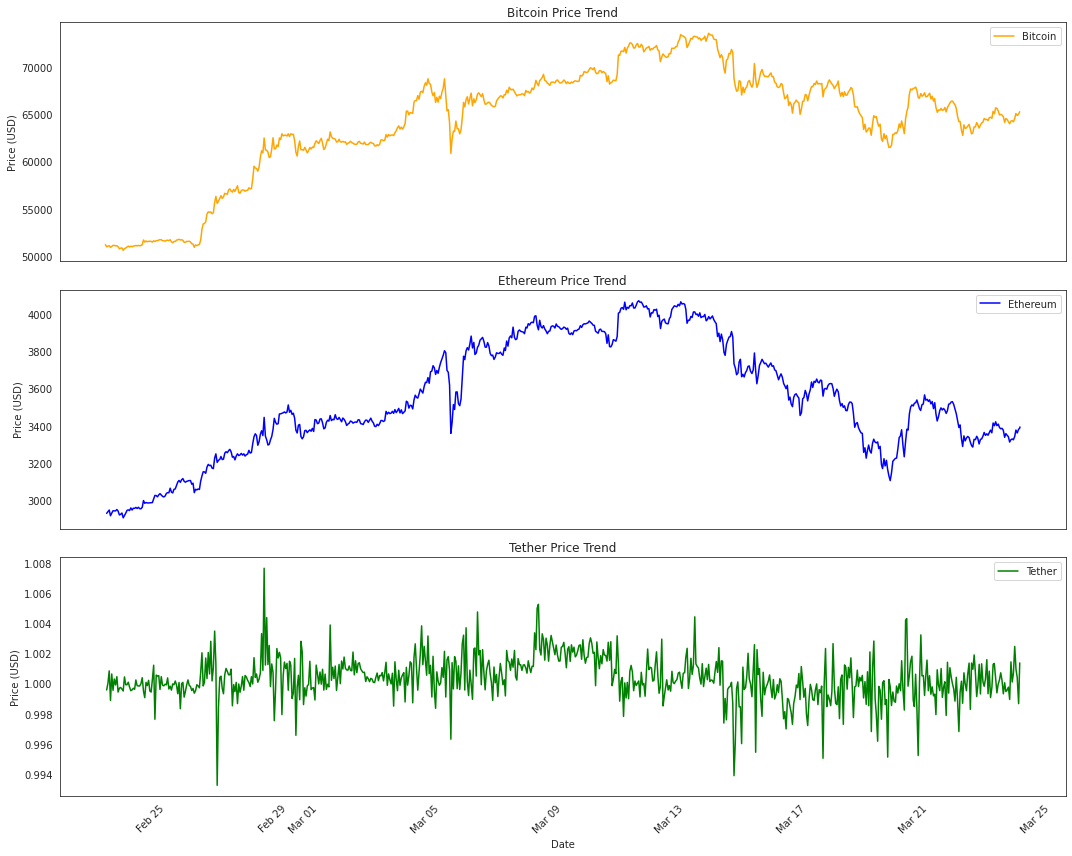

In [ ]:
# Set the style so it is readable with dark and light background
sns.set_style("white")

# Set up the figure and axis objects
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# Plot Bitcoin prices
axes[0].plot(combined_data[combined_data['symbol'] == 'Bitcoin']['price'], color='orange', label='Bitcoin')
axes[0].set_ylabel('Price (USD)')
axes[0].set_title('Bitcoin Price Trend')

# Plot Ethereum prices
axes[1].plot(combined_data[combined_data['symbol'] == 'Ethereum']['price'], color='blue', label='Ethereum')
axes[1].set_ylabel('Price (USD)')
axes[1].set_title('Ethereum Price Trend')

# Plot Tether prices
axes[2].plot(combined_data[combined_data['symbol'] == 'Tether']['price'], color='green', label='Tether')
axes[2].set_ylabel('Price (USD)')
axes[2].set_title('Tether Price Trend')

# Set common xlabel
axes[-1].set_xlabel('Date')

# Format date labels on x-axis
date_format = mdates.DateFormatter('%b %d')
axes[-1].xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legend
for ax in axes:
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

+ **Bitcoin Price Trend:** This graph shows the price of Bitcoin in USD. The price begins at around the $55,000 mark, climbs up to near $60,000, and then has a downward trend, settling close to the $55,000 level again. The trend indicates that Bitcoin experienced a rise followed by a correction, common in volatile markets.

+ **Ethereum Price Trend:** The Ethereum price graph shows a more pronounced upward trend at the start, moving from around $3,000 to peak above $3,800, before entering a decline that brings the price below $3,500. The curve suggests that Ethereum, while also volatile, had a period of significant growth followed by a downturn.

+ **Tether Price Trend:** For Tether, which is pegged to the US dollar, the graph should ideally be a flat line at $1.00. However, there are minor fluctuations above and below the peg value, which is typical for stablecoins due to market dynamics. It's still relatively stable, with deviations within a cent above or below the peg.

## daily returns

Let's proceed with calculating and analyzing the daily returns for Bitcoin, Ethereum, and Tether. Daily returns provide insights into the percentage change in the value of an asset from one day to the next.

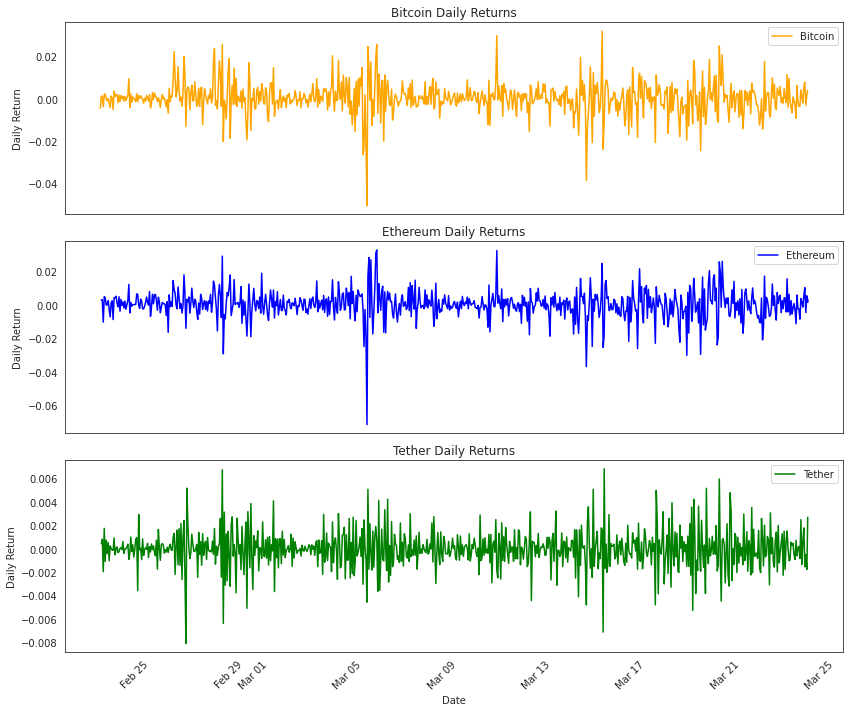

In [ ]:
# Calculate daily returns for each cryptocurrency
combined_data['daily_return'] = combined_data.groupby('symbol')['price'].pct_change()

# Set up the figure and axis objects for the daily returns plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

# Plot Bitcoin daily returns
axes[0].plot(combined_data[combined_data['symbol'] == 'Bitcoin']['daily_return'], color='orange', label='Bitcoin')
axes[0].set_ylabel('Daily Return')
axes[0].set_title('Bitcoin Daily Returns')

# Plot Ethereum daily returns
axes[1].plot(combined_data[combined_data['symbol'] == 'Ethereum']['daily_return'], color='blue', label='Ethereum')
axes[1].set_ylabel('Daily Return')
axes[1].set_title('Ethereum Daily Returns')

# Plot Tether daily returns
axes[2].plot(combined_data[combined_data['symbol'] == 'Tether']['daily_return'], color='green', label='Tether')
axes[2].set_ylabel('Daily Return')
axes[2].set_title('Tether Daily Returns')

# Set common xlabel
axes[-1].set_xlabel('Date')

# Format date labels on x-axis
axes[-1].xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legend
for ax in axes:
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


+ **Bitcoin Daily Returns:** The daily returns for Bitcoin are fluctuating above and below the zero line, indicating days of both positive and negative returns. The graph shows some volatility, with returns varying from approximately -4% to +2%. This suggests that Bitcoin experienced quite some price movement during the period displayed.

+ **Ethereum Daily Returns:** Ethereum's daily returns also show fluctuations around the zero line. This graph indicates more extreme volatility compared to Bitcoin, with a sharp drop below -6% at one point. Generally, Ethereum's returns are more spread out, showing higher potential for gain and loss on any given day.

+ **Tether Daily Returns:** The daily returns for Tether are much less volatile compared to Bitcoin and Ethereum. The fluctuations are very narrow, mostly hovering around the zero line. This is expected as Tether is a stablecoin, typically pegged to a stable asset like the US dollar, and it's designed to maintain a consistent value.

Across all graphs, there doesn't seem to be any clear trend in the sense of a consistent upward or downward movement. The data presented is typical of cryptocurrencies, which are known for their volatility, except for stablecoins like Tether, which exhibit minimal price movement. The timeframe on the x-axis appears to span from late February to late March, although the exact year is not specified.



## Moving Averages

Compute and visualize moving averages to identify trends and potential support/resistance levels. We define two window sizes for the short-term and long-term moving averages. These window sizes represent the number of days over which prices are averaged. We compute the short-term and long-term moving averages for each cryptocurrency using the rolling() function along with the mean() method.

In [ ]:
# Define the window size for the moving averages
window_size_short = 7  # Short-term moving average
window_size_long = 30  # Long-term moving average

# Compute short-term and long-term moving averages for each cryptocurrency
combined_data['SMA_short'] = combined_data.groupby('symbol')['price'].rolling(window=window_size_short).mean().reset_index(0, drop=True)
combined_data['SMA_long'] = combined_data.groupby('symbol')['price'].rolling(window=window_size_long).mean().reset_index(0, drop=True)

I plot the cryptocurrency prices along with their corresponding short-term and long-term moving averages on the same graph for visual comparison.
The short-term moving average (SMA_short) typically responds more quickly to recent price changes, while the long-term moving average (SMA_long) provides a smoother trend representation.

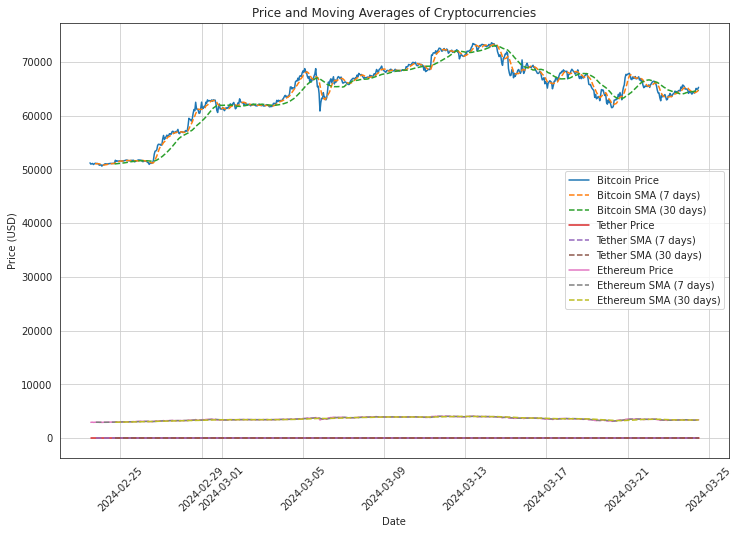

In [ ]:
# Plot the price and moving averages
plt.figure(figsize=(12, 8))
for symbol in combined_data['symbol'].unique():
    plt.plot(combined_data[combined_data['symbol'] == symbol]['price'], label=f'{symbol} Price')
    plt.plot(combined_data[combined_data['symbol'] == symbol]['SMA_short'], linestyle='--', label=f'{symbol} SMA ({window_size_short} days)')
    plt.plot(combined_data[combined_data['symbol'] == symbol]['SMA_long'], linestyle='--', label=f'{symbol} SMA ({window_size_long} days)')

# Format date labels on x-axis
date_format = mdates.DateFormatter('%b %d')
axes[-1].xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.title('Price and Moving Averages of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


The use of Simple Moving Averages (SMA) helps to identify trends by smoothing out short-term fluctuations and highlighting longer-term trends in price movements.

+ **Bitcoin (Light blue line and dashed lines):** The actual price of Bitcoin and its moving averages move closely together, with the 7-day SMA (darker dashed line) closely following the price and the 30-day SMA (lighter dashed line) showing a smoother trend. This suggests that Bitcoin's price has been relatively stable in the short term but has experienced some fluctuations over the longer term.

+ **Ethereum (Green line and dashed lines):** Similar to Bitcoin, Ethereum's price and its SMAs are close together, indicating a degree of short-term stability relative to its price movements. The 7-day SMA shows more immediate reaction to price changes, while the 30-day SMA smoothens out the volatility.

+ **Tether (Red and yellow lines):** Tether's price remains almost flat, as expected for a stablecoin, with both the 7-day and 30-day SMAs aligning almost perfectly with the actual price, showing virtually no deviation over time.

When the price line is above the SMA line, it suggests that the price is in an upward trend compared to its average over that period.
Conversely, when the price line is below the SMA line, it suggests a downward trend. If the price line intersects the SMA line, it might indicate a potential change in trend.
However, there aren't significant crossovers or divergences between the price and SMA lines for Bitcoin and Ethereum, indicating there hasn't been a significant change in their trends during the displayed period. The stable behaviour of the Tether lines reinforces its role as a stablecoin with minimal price variation.



## Volatility Analysis

Measure and compare the volatility of Bitcoin, Ethereum, and Tether prices. One common measure of volatility is the standard deviation of daily returns. A higher standard deviation indicates greater price variability and higher volatility. I compute the standard deviation of daily returns for each cryptocurrency using the groupby() function to group the data by symbol and then calculate the standard deviation of the daily return column.
The standard deviation of daily returns provides a measure of the average magnitude of price fluctuations or volatility for each cryptocurrency over the past 30 days.

In [ ]:
# Compute the standard deviation of daily returns for each cryptocurrency
volatility = combined_data.groupby('symbol')['daily_return'].std()

# Display the volatility of each cryptocurrency
print("\nVolatility of Cryptocurrencies (Standard Deviation of Daily Returns):")
print(volatility)


Volatility of Cryptocurrencies (Standard Deviation of Daily Returns):
symbol
Bitcoin     0.007573
Ethereum    0.008568
Tether      0.001666
Name: daily_return, dtype: float64


I can define a function that takes the volatility data as input and automatically interprets the results to provide meaningful insights.

In [ ]:
def interpret_volatility(volatility):
    """
    Function to interpret the volatility of cryptocurrencies based on standard deviation of daily returns.
    
    Args:
    - volatility: Pandas Series containing the standard deviation of daily returns for each cryptocurrency.
    
    Returns:
    - Interpretation of volatility for each cryptocurrency with its numerical value.
    """
    interpretation = {}
    for symbol, vol in volatility.items():
        if vol < 0.002:
            interpretation[symbol] = f"{symbol} has a low volatility of {vol:.6f}"
        elif 0.002 <= vol < 0.005:
            interpretation[symbol] = f"{symbol} has a moderate volatility of {vol:.6f}"
        else:
            interpretation[symbol] = f"{symbol} has a high volatility of {vol:.6f}"
    return interpretation

interpretation = interpret_volatility(volatility)

print("Interpretation of Volatility:")
for symbol, interpretation in interpretation.items():
    print(interpretation)


Interpretation of Volatility:
Bitcoin has a high volatility of 0.007573
Ethereum has a high volatility of 0.008568
Tether has a low volatility of 0.001666


In [ ]:
bitcoin_volatility = f"{volatility['Bitcoin'] * 100:.4f}%"
ethereum_volatility = f"{volatility['Ethereum'] * 100:.4f}%"
tether_volatility = f"{volatility['Tether'] * 100:.4f}%"


+ Bitcoin, as the pioneer cryptocurrency and often considered a store of value or digital gold, exhibits moderate volatility compared to other assets. Its established position in the cryptocurrency market and widespread adoption contribute to relatively stable price movements, with daily returns fluctuating by approximately {{bitcoin_volatility}} on average over the past 30 days.

+ Ethereum, known for its smart contract capabilities and ecosystem of decentralized applications, tends to experience relatively higher volatility compared to Bitcoin due to its position as a platform for innovation and development. The dynamic nature of the Ethereum network and its active developer community can lead to more pronounced price fluctuations, with daily returns averaging around {{ethereum_volatility}} over the same period.

+ Tether, being a stablecoin pegged to the value of fiat currencies like the US dollar, is designed to maintain a stable price with minimal volatility. The low standard deviation indicates that Tether's daily returns have exhibited very little variability, with fluctuations of around {{tether_volatility}} on average over the past 30 days. This stability is a key characteristic of stablecoins, which aim to provide a reliable medium of exchange and store of value in the volatile cryptocurrency market.


## Correlation Analysis

I can explore the correlation between the prices of different cryptocurrencies using the correlation coefficient. I first create a pivot table where the rows represent dates, columns represent cryptocurrency symbols, and values represent prices.
I then compute the correlation matrix using the corr() method, which calculates the correlation coefficient between the prices of different cryptocurrencies. The correlation matrix provides pairwise correlation coefficients between all pairs of cryptocurrencies.

Correlation Matrix between Cryptocurrencies:
symbol     Bitcoin  Ethereum    Tether
symbol                                
Bitcoin   1.000000  0.914829  0.223954
Ethereum  0.914829  1.000000  0.451721
Tether    0.223954  0.451721  1.000000


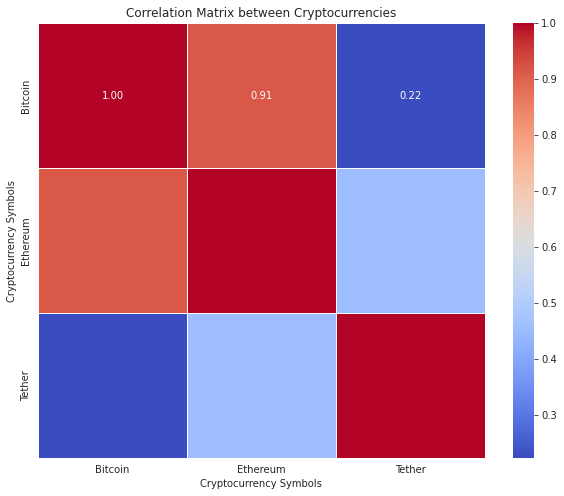

In [ ]:
# Compute the correlation matrix between the prices of different cryptocurrencies
correlation_matrix = combined_data.pivot_table(index='date', columns='symbol', values='price').corr()

# Display the correlation matrix
print("Correlation Matrix between Cryptocurrencies:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title and labels
plt.title('Correlation Matrix between Cryptocurrencies')
plt.xlabel('Cryptocurrency Symbols')
plt.ylabel('Cryptocurrency Symbols')

# Show the plot
plt.show()



In [ ]:
bitcoin_ethereum = round(correlation_matrix['Bitcoin'][1],4)
bitcoin_tether = round(correlation_matrix['Bitcoin'][2],4)
ethereum_tether = round(correlation_matrix['Ethereum'][2],4)

+ **Bitcoin and Ethereum:** The correlation coefficient between Bitcoin and Ethereum prices is approximately {{bitcoin_ethereum}}. This indicates a very strong positive correlation, suggesting that the prices of Bitcoin and Ethereum tend to move closely together. It implies that when one cryptocurrency's price increases, the other's price tends to increase as well, and vice versa.

+ **Bitcoin and Tether:** The correlation coefficient between Bitcoin and Tether prices is approximately {{bitcoin_tether}}. This indicates a moderate positive correlation between Bitcoin and Tether prices. While the correlation is not as strong as between Bitcoin and Ethereum, there is still a tendency for Bitcoin and Tether prices to move somewhat in the same direction.

+ **Ethereum and Tether:** The correlation coefficient between Ethereum and Tether prices is approximately {{ethereum_tether}}. This indicates a moderate positive correlation between Ethereum and Tether prices. Similar to the relationship between Bitcoin and Tether, there is a tendency for Ethereum and Tether prices to move somewhat in the same direction, but the correlation is not as strong as between Bitcoin and Ethereum.

Overall, the correlation matrix suggests that Bitcoin and Ethereum prices are highly correlated, while the correlations between Bitcoin (or Ethereum) and Tether are moderate.

# Conclusion

Based on the results of my exploratory analysis, I have gained several insights into the price movements and relationships between Bitcoin, Ethereum, and Tether over the past 30 days. Here's a summary of my findings and potential avenues for future work:

1. **Price Trends and Volatility**:
   - Bitcoin experienced a rise followed by a correction, settling close to the $55,000 level again, indicating relatively stable short-term price movements.
   - Ethereum exhibited a significant growth period followed by a downturn, showing more pronounced volatility compared to Bitcoin.
   - Tether, as a stablecoin, maintained a relatively stable price around the peg value of $1.00 with minimal fluctuations.

   *Future Work*: Further analysis could focus on understanding the factors driving the price movements of Bitcoin and Ethereum, such as market sentiment, regulatory developments, and technological advancements. Additionally, exploring advanced volatility modelling techniques could provide deeper insights into cryptocurrency price dynamics.

2. **Daily Returns and Moving Averages**:
   - Daily returns for Bitcoin and Ethereum fluctuated around the zero line, indicating both positive and negative returns with varying magnitudes.
   - Moving averages highlighted short-term stability and longer-term trends in price movements for Bitcoin, Ethereum, and Tether.

   *Future Work*: Developing trading strategies based on moving average crossovers and other technical indicators could be explored to capture potential trading opportunities and improve risk-adjusted returns.

3. **Volatility Analysis**:
   - Bitcoin and Ethereum exhibited higher volatility compared to Tether, reflecting their dynamic nature and speculative trading behaviour.
   - Tether maintained low volatility, consistent with its design as a stablecoin pegged to fiat currencies.

   *Future Work*: Implementing advanced volatility forecasting models, such as GARCH (Generalized Autoregressive Conditional Heteroskedasticity), could enhance my ability to predict and manage cryptocurrency price volatility.

4. **Correlation Analysis**:
   - Bitcoin and Ethereum prices showed a very strong positive correlation, indicating closely related price movements.
   - Bitcoin and Tether exhibited a moderate positive correlation, while Ethereum and Tether showed a similar pattern.

   *Future Work*: Exploring dynamic correlations and co-movements between cryptocurrencies using time-varying correlation models could provide valuable insights for portfolio diversification and risk management strategies.

5. **Model Development and Deployment**:
   - Future work could involve developing and validating predictive models for real-time forecasting of cryptocurrency prices based on historical data and relevant features.
   - Techniques such as time series analysis, machine learning, and deep learning could be employed to build robust forecasting models.

   *Future Work*: Validating the predictive models using out-of-sample data and implementing them in real-time trading environments could enhance their practical utility and effectiveness in capturing market trends and making informed trading decisions.

In conclusion, my exploratory analysis provides valuable insights into the dynamics of cryptocurrency markets and lays the foundation for further research and model development in the field of cryptocurrency price forecasting. By leveraging advanced analytical techniques and incorporating real-time data streams, I can continue to refine my understanding of cryptocurrency price movements and develop innovative strategies.